# TNE 2: Principal Component Analysis

28/11/2018

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as la

In [2]:
# Do not show the warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [3]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

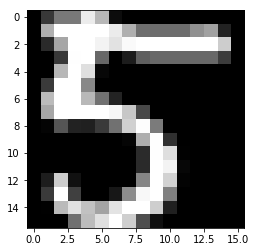

In [4]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

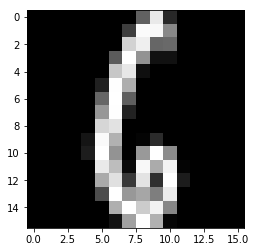

In [5]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [6]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [7]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6 , mean on the features
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))  # np.tile() repets moy_train in an array of dim (N_train,1)

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components : the set of the eigenvectors
proj = pca.transform(x_train_centre)  # computes the projection coefficients

In [8]:
# Principal component analysis for the test set
moy_test = x_test_brut.mean(axis=0)  # all the data, 5 & 6 , mean on the features
x_test_centre = x_test_brut-np.tile(moy_test,(N_test,1))  # np.tile() repets moy_train in an array of dim (N_train,1)
proj_test = pca.transform(x_test_centre)  # computes the projection coefficients

### Display the averaged images of 5 & 6 respectively

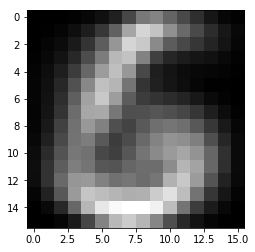

In [9]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

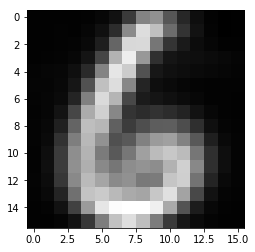

In [10]:
n = 12   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

#### Digit 5 : the original digit

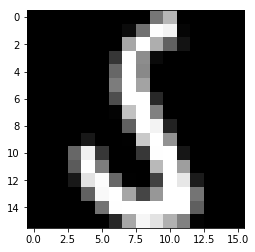

In [11]:
n = 12;
I = reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Digit 5 : reconstruction after PCA

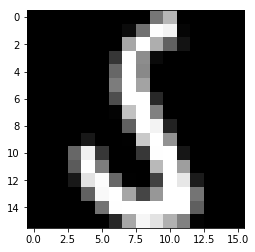

In [12]:
n=12;
I = np.reshape(comp.T.dot(proj[n,:]), (16,16)) + I_moy

plt.imshow(I,cmap='gray')
plt.show()

We can get the original image back after the reconstruction.

#### Digit 5 : reconstruction after PCA with only 1st component

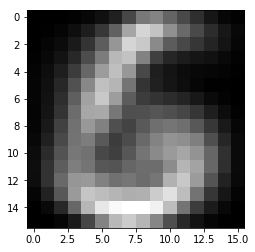

In [13]:
n = 12;
I = np.reshape(comp.T[0,:] * (proj[n,:]), (16,16)) + I_moy

plt.imshow(I,cmap='gray')
plt.show()

The 1st component maximizes the variance of the projected image. It is the component that holds the most information on this n = 12 image's differences compared to the other images in the dataset. That is why even though we projected the original image on one component only, we still get a projection that has similarities with the original image.

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


---

Input parameters : 
* number of components to keep after PCA

Output parameters :
* components : the eigenvectors representing the direction of maximum variance in the data, dim 
(n_components x n_features) --> **corresponds to $U^T$ (class notations)**
* singular_values : the eigenvalues
* proj : the matrix containing the projected vectors $z = U^Tx$, one for each image (345).

We can reconstruct an image by adding the successive contributions of principal components in two ways (mathematically equivalent, only differing in python implementation): $x_{rec} = Uz$

We can either add each contribution one after the other.

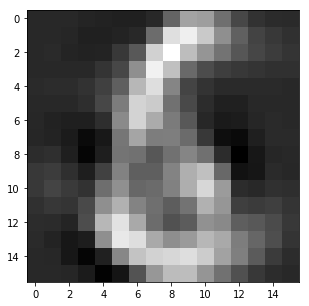

In [14]:
M = 10
n = 12

l = np.arange(0,M)
I = I_moy

plt.rcParams["figure.figsize"] = [7,5]
plt.figure()

for i in l:
    I = I + np.reshape(comp.T[:,i] * (proj[n,i]), (16,16))
plt.imshow(I,cmap='gray')
plt.show()

Or directly compute the matrix product $Uz$ with the right slicing.

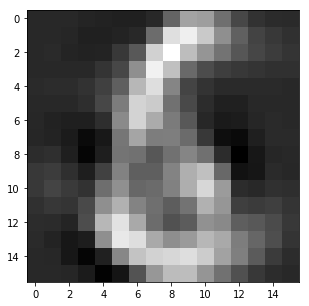

In [15]:
# Digit 5 : reconstruction after PCA with M most important components 
n=12
M = 10
I = np.reshape(comp.T[:,0:M].dot(proj[n,0:M]), (16,16)) + I_moy
plt.imshow(I,cmap='gray')
plt.show()

Let us visualize the reconstruction of a given image by successively adding more principal components.

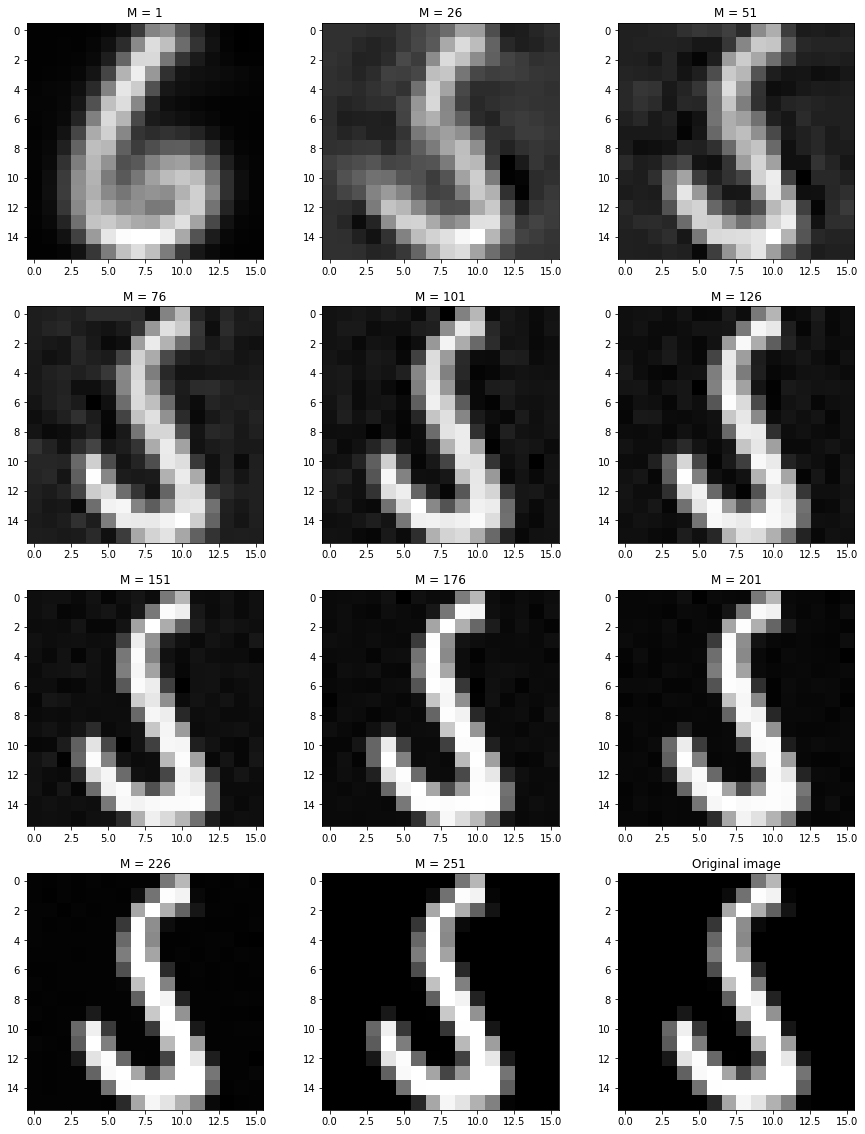

In [16]:
n = 12

# show the projected images of the digit
plt.rcParams["figure.figsize"] = [15,20]
for M in range(1,276,25):
  plt.subplot(4,3,int(M/25)+1)
  I = np.reshape(comp.T[:,0:M].dot(proj[n,0:M]), (16,16)) + I_moy
  plt.imshow(I,cmap = 'gray')
  plt.title('M = '+str(M))
    
# show the original digit
plt.subplot(4,3,12)
I = reshape(train_5[n,:],(16,16))
plt.imshow(I,cmap = 'gray')
plt.title('Original image')
plt.show()

In this case, 50 components give us an acceptable reconstruction, 100 components give us a nice one and 175 components a very nice one. The extra components only add a small piece of useful information.
Ths shows that we are able to reconstruct a nice image by not using even half of all the components.

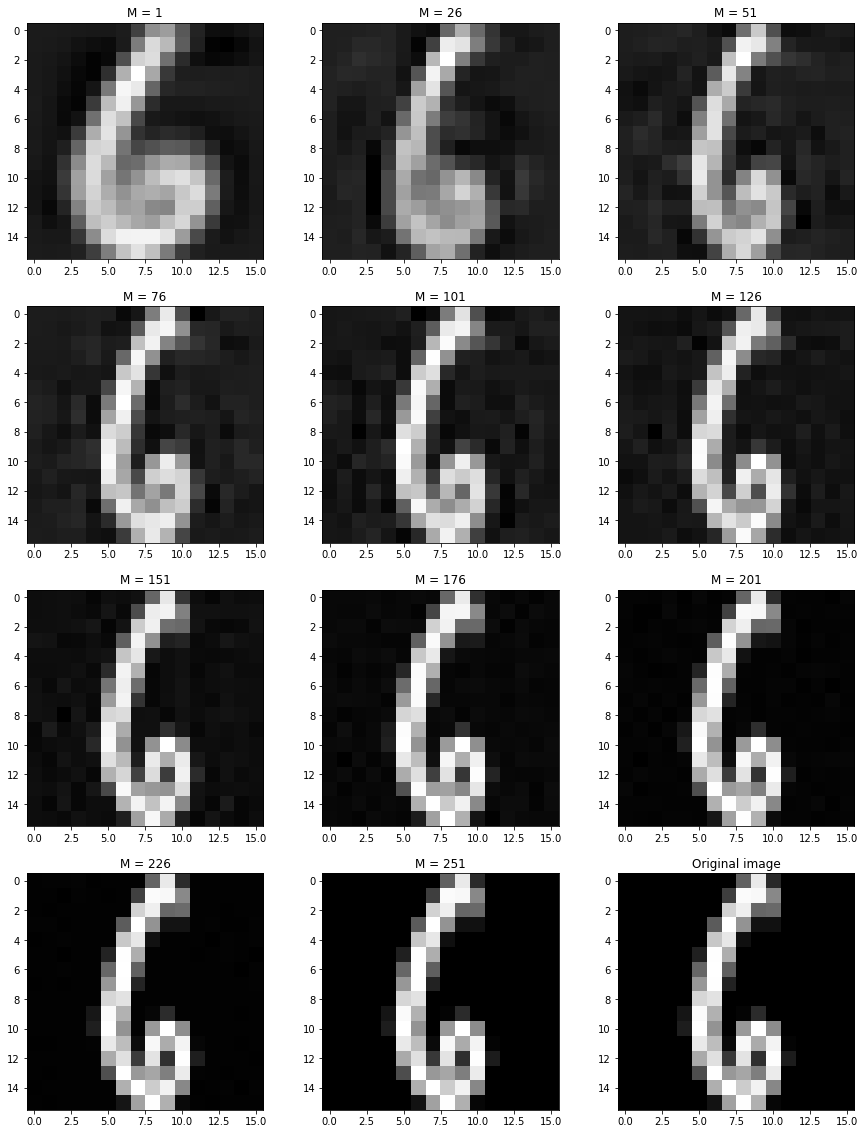

In [17]:
n = 5

# show the projected images of the digit
plt.rcParams["figure.figsize"] = [15,20]
for M in range(1,276,25):
  plt.subplot(4,3,int(M/25)+1)
  I = np.reshape(comp.T[:,0:M].dot(proj[145+n,0:M]), (16,16)) + I_moy
  plt.imshow(I,cmap = 'gray')
  plt.title('M = '+ str(M))
    
# show the original digit
plt.subplot(4,3,12)
I = reshape(train_6[n,:],(16,16))
plt.imshow(I,cmap='gray')
plt.title('Original image')
plt.show()

The results are really similar with an image of digit 6.

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


---

Let us select the data for each class (5 or 6) for the training set.

In [18]:
class5 = proj[0:145,0:2]
class6 = proj[145:,0:2]

Let us display the results.

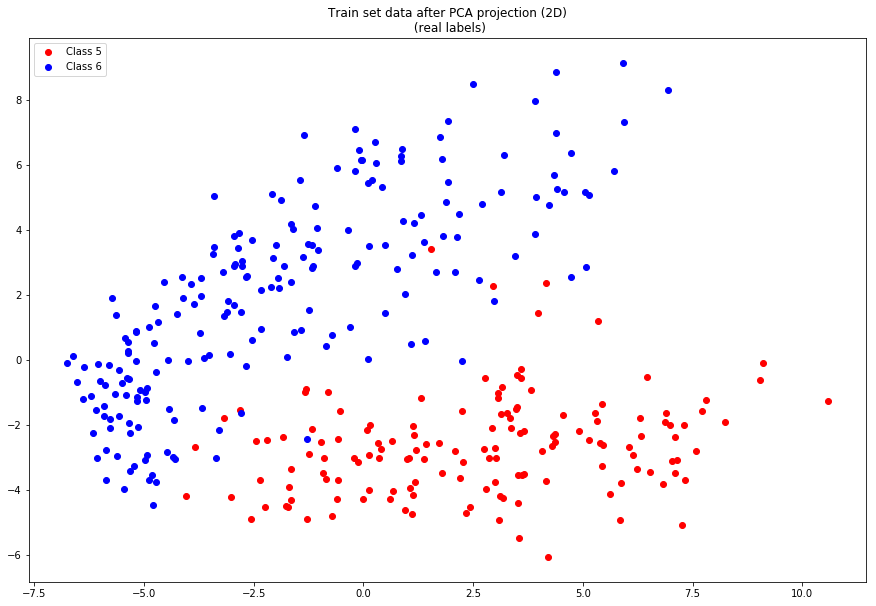

In [19]:
plt.rcParams["figure.figsize"] = [15,10]
plt.plot(class5[:,0],class5[:,1],'ro', label = 'Class 5')
plt.plot(class6[:,0],class6[:,1],'bo', label = 'Class 6')
plt.legend(loc = 'upper left')
plt.title('Train set data after PCA projection (2D)\n (real labels)')
plt.show()

The data seem to be rather well separated, even though we only used the first two principal components. At first glance, we can draw a straight line separating the two clouds of data.
Therefore, we might consider applying LDA on this set of data.



LDA uses the same variance matrix for data from different classes. Let's see the variance matrices for each class:

In [20]:
# on train set
sigma5 = np.cov(proj[0:145,0:2].T) # variance matrix for digit 5
sigma6 = np.cov(proj[145:,0:2].T)   # variance matrix for digit 6
sigma = 1/len(proj)*(len(proj[0:145,0:2])*sigma5 + len(proj[145:,0:2])*sigma6) # # variance matrix on both 5 and 6 digits

# on test set
sigma5_test = np.cov(proj_test[0:411,0:2].T)
sigma6_test = np.cov(proj_test[411:,0:2].T)

In [21]:
print('On train set :\n', sigma5)
print('\n',sigma6)
print('\n',sigma)

print('\nOn test set : \n',sigma5_test)
print('\n',sigma6_test)

On train set :
 [[9.85646951 1.10891014]
 [1.10891014 2.31898268]]

 [[11.24853769  7.88609885]
 [ 7.88609885  9.4415004 ]]

 [[10.66346556  5.03771519]
 [ 5.03771519  6.44797846]]

On test set : 
 [[7.2853196  0.75708708]
 [0.75708708 2.23647501]]

 [[10.88547977  6.75907806]
 [ 6.75907806  8.0635402 ]]


The variance matrices between classes are not quite similar.
We still continue testing LDA (because of the 2D representation we obtained earlier).

### Let's implement LDA with scikit-learn.

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [23]:
# labelling data

class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

class_test = np.ones(N_test) # assigning label 1 for digit 6
class_test[:len(train_5) - 145] = 0  # assigning label 0 for digit 5 (knowing that the 145 first images of 5 from train_5 are in the train set

In [24]:
# Training the model
clf_lda = lda()
clf_lda.fit(proj[:,0:2],class_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [25]:
# Predicted classes for the training and test sets
pred_train_LDA = clf_lda.predict(proj[:,0:2])
pred_test_LDA = clf_lda.predict(proj_test[:,0:2])

In [26]:
# Prediction errors
error_train_lda = 1-clf_lda.score(proj[:,0:2],class_train)
error_test_lda = 1-clf_lda.score(proj_test[:,0:2],class_test)

In [27]:
# Real classes for the test set
class5_test = proj_test[0:411,0:2]
class6_test = proj_test[411:,0:2]

Let us now display the results.

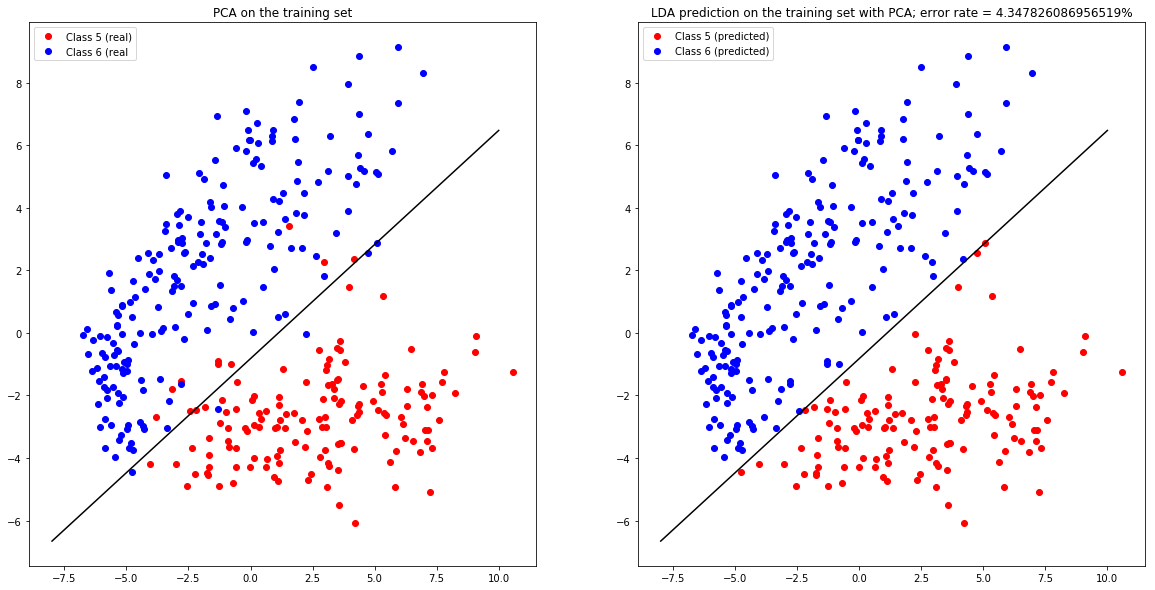

In [28]:
plt.rcParams["figure.figsize"] = [20,10]

# Decision boundary
w = clf_lda.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-8, 10)
yy = a * xx - (clf_lda.intercept_[0]) / w[1]

# PCA on the training set
plt.subplot(1,2,1)
plt.plot(class5[:,0],class5[:,1],'ro', label = 'Class 5 (real)')
plt.plot(class6[:,0],class6[:,1],'bo', label = 'Class 6 (real')
plt.legend(loc = 'upper left')
plt.title('PCA on the training set')
plt.plot(xx, yy, 'k-') # Drawing decision boundary

# LDA prediction on the training set
plt.subplot(1,2,2)
plt.plot(proj[pred_train_LDA == 0][:,0],proj[pred_train_LDA == 0][:,1],'ro', label = 'Class 5 (predicted)')
plt.plot(proj[pred_train_LDA == 1][:,0],proj[pred_train_LDA == 1][:,1],'bo', label = 'Class 6 (predicted)')
plt.legend(loc = 'upper left')
plt.title("LDA prediction on the training set with PCA; error rate = "+str(error_train_lda*100)+"%")
plt.plot(xx, yy, 'k-') # Drawing decision boundary
plt.show()

The error rate is quite acceptable. It is higher than the one we got in TP3 using logistic regression with scikit-learn, but we have to keep in mind that we had used the whole training set. Here we were able to use a simpler classification by only keeping the most important information on the images.

Here are the results for the test set.

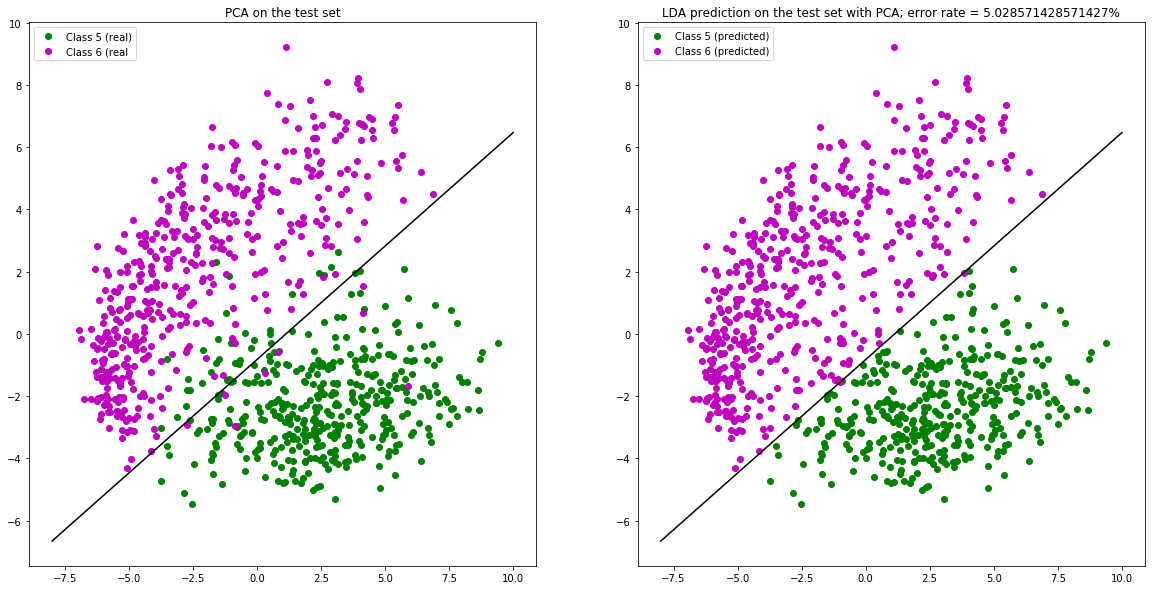

In [29]:
plt.rcParams["figure.figsize"] = [20,10]

# Decision boundary
w = clf_lda.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-8, 10)
yy = a * xx - (clf_lda.intercept_[0]) / w[1]

# PCA on the test set
plt.subplot(1,2,1)
plt.plot(class5_test[:,0],class5_test[:,1],'go', label = 'Class 5 (real)')
plt.plot(class6_test[:,0],class6_test[:,1],'mo', label = 'Class 6 (real')
plt.legend(loc = 'upper left')
plt.title('PCA on the test set')
plt.plot(xx, yy, 'k-') # Drawing decision boundary

# LDA prediction on the test set
plt.subplot(1,2,2)
plt.plot(proj_test[pred_test_LDA == 0][:,0],proj_test[pred_test_LDA == 0][:,1],'go', label = 'Class 5 (predicted)')
plt.plot(proj_test[pred_test_LDA == 1][:,0],proj_test[pred_test_LDA == 1][:,1],'mo', label = 'Class 6 (predicted)')
plt.legend(loc = 'upper left')
plt.title("LDA prediction on the test set with PCA; error rate = "+str(error_test_lda*100)+"%")
plt.plot(xx, yy, 'k-') # Drawing decision boundary

plt.show()

The error rate is acceptable here again.

PCA seems to be a really good method for pre-clustering when the data set had many features. It allows to apply LDA that has good results for low dimension data.

PCA also allows to vizualize the data in 2D.

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    